In [1]:
load(file="0725-normalizedcounts_withref.Rda")

In [2]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject



In [3]:
library(ggplot2)
library(cowplot)


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots




In [4]:

## remove the x-axis text and tick
## plot.margin to adjust the white space between each plot.
## ... pass any arguments to VlnPlot in Seurat
modify_vlnplot<- function(obj, 
                          feature, 
                          pt.size = 0, 
                          plot.margin = unit(c(-0.75, 0, -0.75, 0), "cm"),
                          ...) {
  p<- VlnPlot(obj, features = feature, pt.size = pt.size, ... )  + 
    xlab("") + ylab(feature) + ggtitle("") + 
    theme(legend.position = "none", 
          axis.text.x = element_blank(), 
          axis.ticks.x = element_blank(), 
          axis.title.y = element_text(size = rel(1), angle = 0), 
          axis.text.y = element_text(size = rel(1)), 
          plot.margin = plot.margin ) 
  return(p)
}

## extract the max value of the y axis
extract_max<- function(p){
  ymax<- max(ggplot_build(p)$layout$panel_scales_y[[1]]$range$range)
  return(ceiling(ymax))
}


## main function
StackedVlnPlot<- function(obj, features,
                          pt.size = 0, 
                          plot.margin = unit(c(-0.75, 0, -0.75, 0), "cm"),
                          ...) {
  
  plot_list<- purrr::map(features, function(x) modify_vlnplot(obj = obj,feature = x, ...))
  
  # Add back x-axis title to bottom plot. patchwork is going to support this?
  plot_list[[length(plot_list)]]<- plot_list[[length(plot_list)]] +
    theme(axis.text.x=element_text(), axis.ticks.x = element_line())
  
  # change the y-axis tick to only max value 
  ymaxs<- purrr::map_dbl(plot_list, extract_max)
  plot_list<- purrr::map2(plot_list, ymaxs, function(x,y) x + 
                            scale_y_continuous(breaks = c(y)) + 
                            expand_limits(y = y))

  p<- patchwork::wrap_plots(plotlist = plot_list, ncol = 1)
  return(p)
}

In [5]:
normalized_counts

,1Ca,1N,2534465Ca,2534465N,2537821Ca,2537821N,3Ca,3N,N6,N7,⋯,TCGA.W5.AA2U.01A,TCGA.W5.AA2U.11A,TCGA.W5.AA30.01A,TCGA.W5.AA30.11A,TCGA.W5.AA31.01A,TCGA.W5.AA31.11A,TCGA.W5.AA34.01A,TCGA.W5.AA34.11A,TCGA.ZU.A8S4.01A,TCGA.ZU.A8S4.11A
A1BG,96.573339,6.107005e+03,67.050474,3330.92856,10.017859,5.482850e+03,341.664910,6376.926727,4.058523e+03,5.279644e+03,⋯,8.7497128,8.249479e+03,5.005496e+00,9.565688e+03,5.392732e+02,8.358989e+03,6.9056890,7.247501e+03,1.364069e+01,1.043196e+04
A1CF,797.203448,2.855599e+04,341.741127,29478.26310,2645.827982,1.899896e+04,3237.748579,25468.201568,1.521812e+04,1.896347e+04,⋯,2446.2354965,1.654695e+04,1.050244e+03,1.075224e+04,2.221595e+03,2.008721e+04,620.3610578,1.546621e+04,3.866610e+02,1.445537e+04
A2M,20316.379548,1.831228e+05,42931.769748,39789.29036,32404.435935,1.574640e+05,20257.852703,75720.270240,1.044109e+05,1.442421e+05,⋯,9793.2311878,1.861539e+05,1.257062e+04,2.796824e+05,2.521571e+04,1.911207e+05,2988.4368954,2.316569e+05,1.079241e+04,1.526202e+05
A2ML1,27.141527,9.572108e+00,25.955022,39.40134,13.357146,1.580831e+01,5.612565,19.115488,8.935541e+00,5.940193e+00,⋯,0.9210224,1.411615e+00,5.005496e+00,3.727376e+00,2.625113e+00,0.000000e+00,2.8773704,5.221542e+00,1.049284e+00,1.403843e+00
A3GALT2,3.787190,0.000000e+00,6.488756,0.00000,6.678573,2.634719e+00,2.104712,1.274366,8.935541e-01,7.128232e+00,⋯,0.0000000,0.000000e+00,0.000000e+00,0.000000e+00,7.500322e-01,0.000000e+00,0.5754741,0.000000e+00,5.246419e-01,1.403843e+00
A4GALT,532.100163,1.100792e+02,151.404297,54.55570,169.190515,9.089781e+01,119.968582,133.808415,1.456493e+02,1.199919e+02,⋯,647.0182366,9.881307e+01,1.556254e+02,1.503375e+02,6.236518e+02,9.055180e+01,540.3701607,3.863941e+01,7.114144e+02,5.755757e+01
A4GNT,5.680785,9.572108e+00,0.000000,0.00000,6.678573,3.952079e+00,11.225131,1.274366,2.680662e+00,1.188039e+00,⋯,32.6962952,1.129292e+01,1.092108e+01,1.118213e+01,1.350058e+01,1.175997e+00,31.0756003,8.354467e+00,2.098567e+00,7.019216e+00
AAAS,515.057809,5.623614e+02,901.937024,366.73554,522.041785,3.438308e+02,512.146579,449.851146,3.681443e+02,4.954121e+02,⋯,956.4817632,1.123646e+03,9.446736e+02,1.161699e+03,1.007293e+03,1.227741e+03,1484.1476513,1.229151e+03,9.097290e+02,9.840941e+02
AACS,818.664190,3.158796e+02,2980.501724,206.09931,910.512112,2.068255e+02,595.633487,168.216293,1.688817e+02,3.457192e+02,⋯,782.4085295,1.962145e+02,1.229532e+03,2.894928e+02,7.579075e+02,3.916071e+02,1797.2055506,3.112039e+02,6.584255e+02,2.863840e+02
AADAC,554.192104,1.127953e+04,214.128934,6346.64640,320.571501,7.186196e+03,2521.444939,16162.782111,8.862269e+03,1.029792e+04,⋯,439.7881964,1.711301e+04,2.049978e+03,1.301724e+04,6.720289e+02,1.370743e+04,445.9924117,1.297031e+04,5.209694e+02,1.306978e+04


In [6]:
normalized_counts2<-normalized_counts[,c(1,3,5,7,13,14,15,16,17,24,25,26,27,28,29,31,33,35,37,39,41,43)]

In [7]:
normal <- CreateSeuratObject(counts = normalized_counts2, project = "normal",min.cells = 2)

In [8]:
normal@meta.data

,orig.ident,nCount_RNA,nFeature_RNA
,<fct>,<dbl>,<int>
1Ca,normal,19855061,16788
2534465Ca,normal,22917140,16364
2537821Ca,normal,20322316,16670
3Ca,normal,20135939,16649
T4,normal,22333223,16545
T5,normal,20112347,16544
T6,normal,18938421,16756
T7,normal,19607741,16789
2Ca,normal,19056779,16623


In [9]:
normal@meta.data$label<-c('type2','type1','type2','type3','type3','type2','type3','type2','type2','type3','type2','type3','type3','type2','type1','type1','type1','type1','type1','type3','type1','type3')

In [10]:
table(normal@meta.data$label)


type1 type2 type3 
    7     7     8 

In [11]:
normal@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,label
,<fct>,<dbl>,<int>,<chr>
1Ca,normal,19855061,16788,type2
2534465Ca,normal,22917140,16364,type1
2537821Ca,normal,20322316,16670,type2
3Ca,normal,20135939,16649,type3
T4,normal,22333223,16545,type3
T5,normal,20112347,16544,type2
T6,normal,18938421,16756,type3
T7,normal,19607741,16789,type2
2Ca,normal,19056779,16623,type2


In [12]:
options(repr.plot.height=6,repr.plot.width=7)

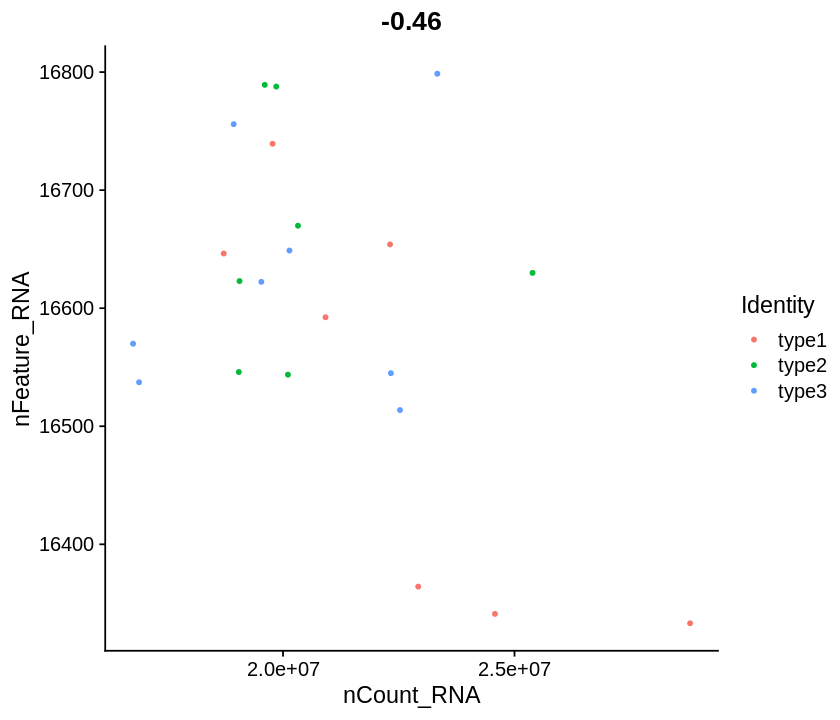

In [13]:
FeatureScatter(normal, feature1 = "nCount_RNA", feature2 = "nFeature_RNA",group.by='label')

In [14]:
Idents(object = normal) <- "label"

In [15]:
normal3.markers <- FindAllMarkers(normal, only.pos = TRUE)
top100<-normal3.markers %>% group_by(cluster) %>% top_n(n = 100,wt=avg_log2FC)

Calculating cluster type2

Calculating cluster type1

Calculating cluster type3



In [16]:
top100<-as.data.frame(top100)
write.csv(top100,file="0806-top100diffgene.csv")

In [17]:
table(top100$cluster)


type2 type1 type3 
  162   151    19 

In [18]:
top100

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
0.0002468381,Inf,1,1.000,1,type2,COL11A1
0.0002468381,Inf,1,1.000,1,type2,ITGA11
0.0002468381,Inf,1,1.000,1,type2,NID2
0.0002468381,Inf,1,1.000,1,type2,NOX4
0.0002468381,Inf,1,1.000,1,type2,SLITRK4
0.0002468381,Inf,1,1.000,1,type2,ST6GALNAC5
0.0002468381,Inf,1,1.000,1,type2,WISP1
0.0003243572,Inf,1,1.000,1,type2,ADAMTS5
0.0003243572,Inf,1,1.000,1,type2,CLEC5A


In [19]:
vm  <- as(as.matrix(normal@assays$RNA@data), 'sparseMatrix') 

In [20]:
vm<-as.data.frame(vm)

In [21]:
options(repr.plot.height=8,repr.plot.width=5)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



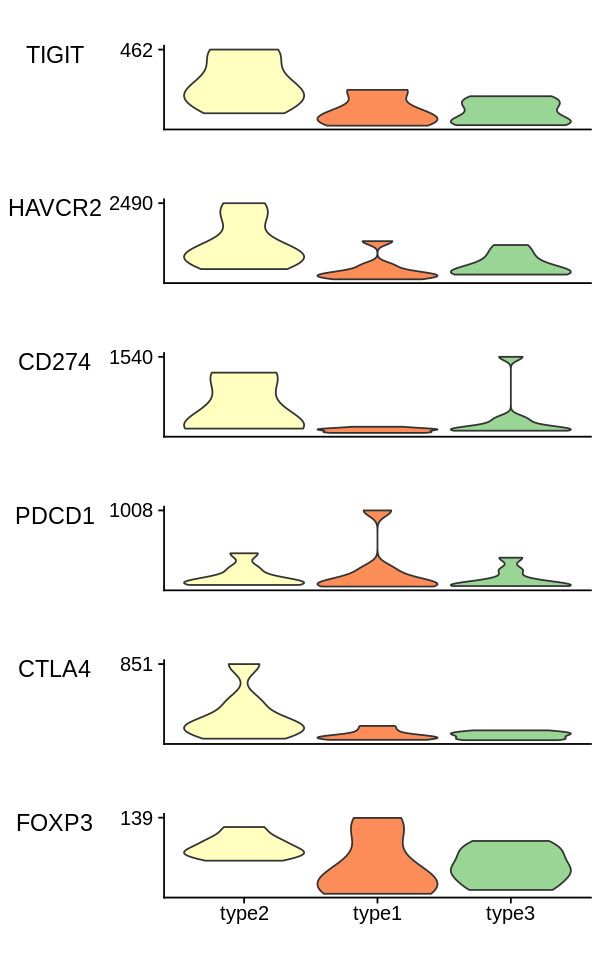

In [22]:
features<- c('TIGIT',"HAVCR2",'CD274','PDCD1','CTLA4','FOXP3')
StackedVlnPlot(obj =normal, features = features,cols=c('#FFFFBF','#FC8D59','#99D594'))
ggsave('Tcellmarker.pdf',height=8,width=5)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



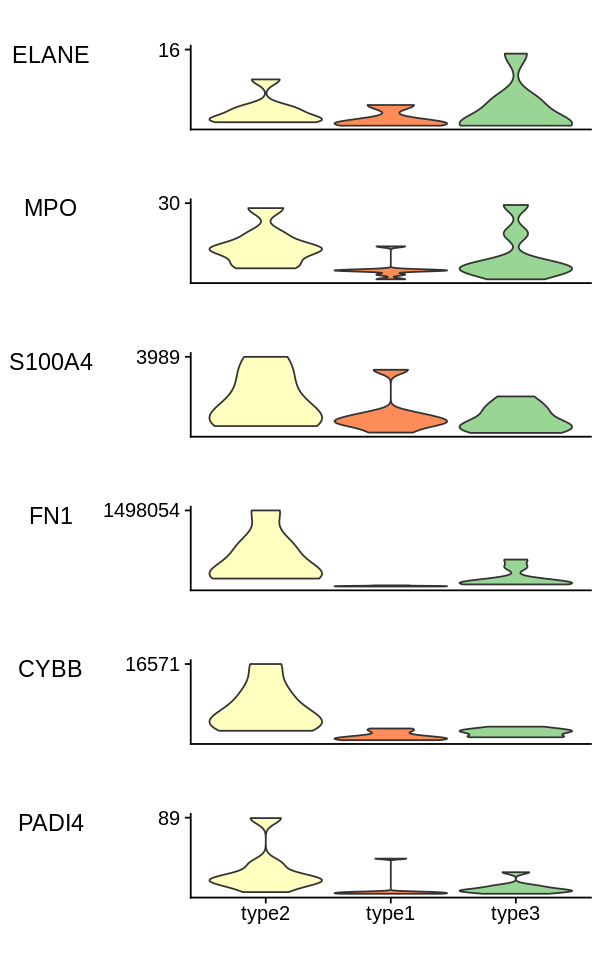

In [23]:
features<- c('ELANE','MPO','S100A4','FN1','CYBB','PADI4')
StackedVlnPlot(obj =normal, features = features,cols=c('#FFFFBF','#FC8D59','#99D594'))
ggsave('neutrophilmarker.pdf',height=8,width=5)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



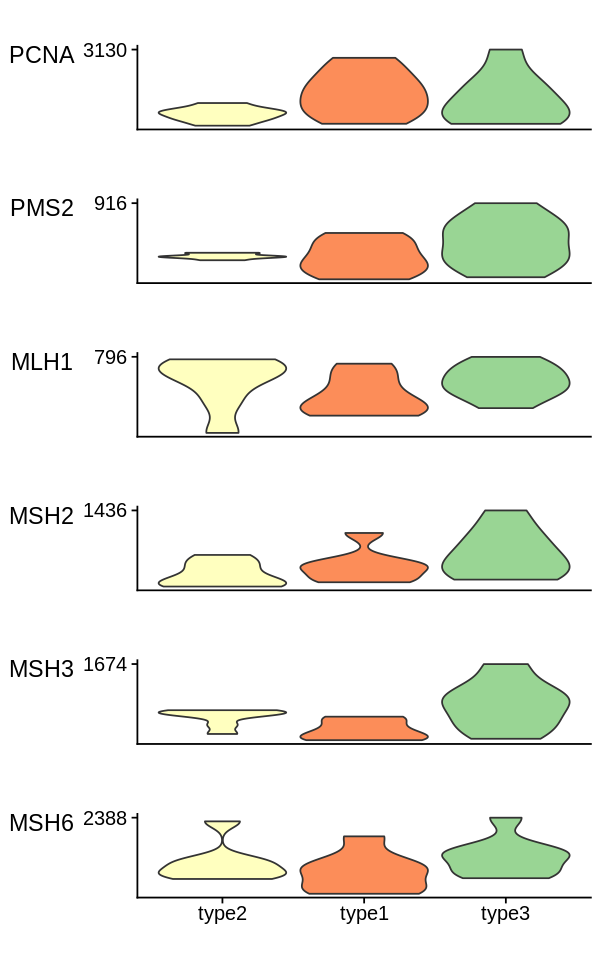

In [25]:
features<- c('PCNA','PMS2',"MLH1",'MSH2','MSH3','MSH6')
StackedVlnPlot(obj =normal, features = features,cols=c('#FFFFBF','#FC8D59','#99D594'))
ggsave('mutationmarker.pdf',height=8,width=5)

In [27]:
rownames(normalized_counts)[grep('FCGR',rownames(normalized_counts))]

[1] "FCGR1A" "FCGR1B" "FCGR2A" "FCGR2B" "FCGR3A" "FCGR3B" "FCGRT"

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



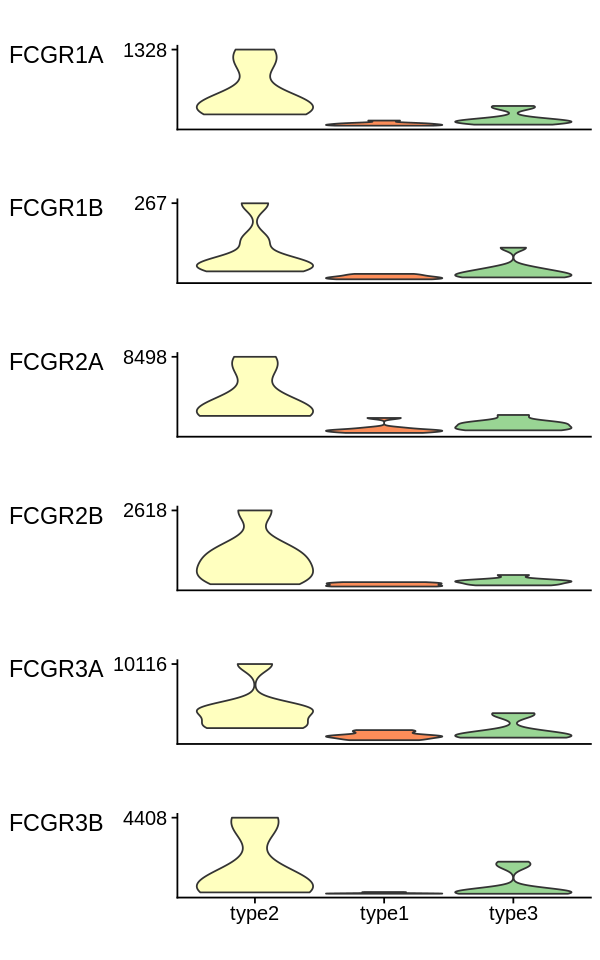

In [28]:
features<- c('FCGR1A',"FCGR1B",'FCGR2A','FCGR2B','FCGR3A','FCGR3B')
StackedVlnPlot(obj =normal, features = features,cols=c('#FFFFBF','#FC8D59','#99D594'))
ggsave('FCGRmarker.pdf',height=8,width=5)

In [29]:
rownames(normalized_counts)[grep('FGFR',rownames(normalized_counts))]

[1] "FGFR1"    "FGFR1OP"  "FGFR1OP2" "FGFR2"    "FGFR3"    "FGFR4"    "FGFRL1"

In [30]:
features<-rownames(normalized_counts)[grep('FGFR',rownames(normalized_counts))]

In [31]:
features<-features[1:6]

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



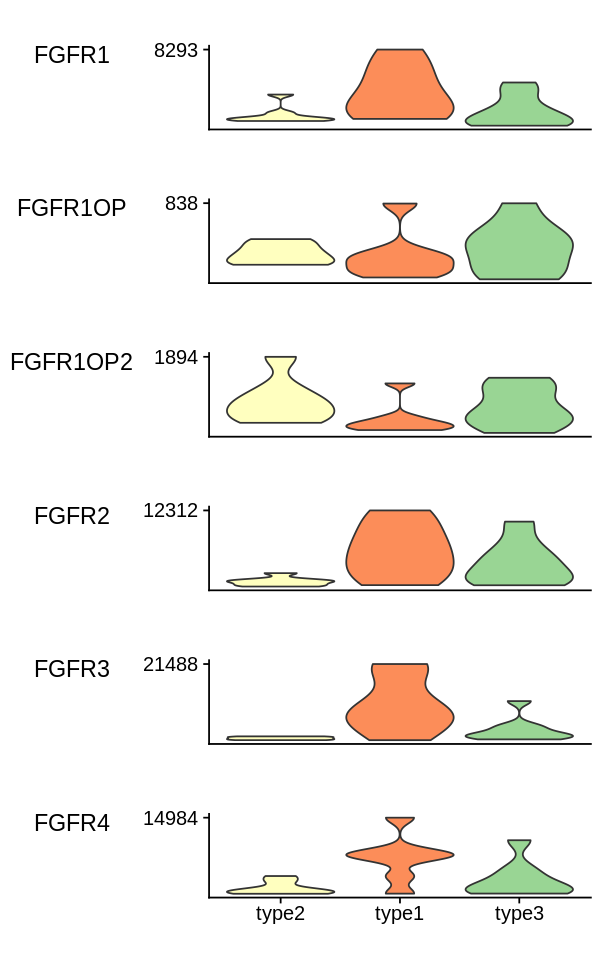

In [32]:
StackedVlnPlot(obj =normal, features = features,cols=c('#FFFFBF','#FC8D59','#99D594'))
ggsave('FGFRmarker.pdf',height=8,width=5)